MovieWriter imagemagick unavailable; using Pillow instead.


This graph is a intentionally left blank. We will use it to make animation in the later part of the program


<ipython-input-1-367e6e237dba>:19: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim((y1, y2));


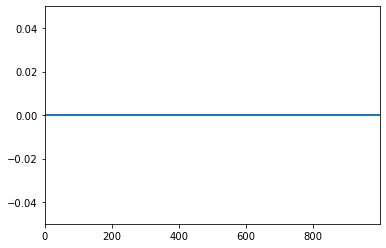

In [1]:
## Code to generate GIF image <source = "http://tiao.io/posts/notebooks/save-matplotlib-animations-as-gifs/">
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from matplotlib import animation, rc
from IPython.display import HTML
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots();


ax.set_xlim(( 0, 1000));
ax.set_ylim((-0, 10));
line, = ax.plot([], [], lw=2);

def sett(x1,x2,y1,y2):
    ax.set_xlim(( x1,x2));
    ax.set_ylim((y1, y2));
    line, = ax.plot([], [], lw=2);

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i,rho,xx,step):
    x = xx
    rr=step*i
    y = rho[rr]
    sett(xx.min(),xx.max(),rho[rr].min(),rho[rr].max())
    line.set_data(x, y)
    return (line,)
print("This graph is a intentionally left blank. We will use it to make animation in the later part of the program")


spacegrid=1000
width=1.0
xx=np.arange(spacegrid)
timesteps=1000
simulationtime=1.0
velocity=1.0
dt=simulationtime/timesteps
dx=width/spacegrid
rho=np.zeros((timesteps,spacegrid),float)
rho[0,30:300]=10
veolcitygrid=velocity*np.ones(spacegrid)

timesteps=1000
simulationtime=1.0
velocity=1.0
dt=simulationtime/timesteps
velocitygrid=10*np.sin(xx/320)
zeromatrix=np.zeros((spacegrid),float)
rhoupwind=np.zeros((timesteps,spacegrid+2),float)
rhoupwind[0,400:600]=10
for t in range(timesteps-1):
    aplus=np.maximum(zeromatrix,veolcitygrid)
    aminus=np.minimum(zeromatrix,veolcitygrid)
    rhoplus=(rhoupwind[t,2:]-rhoupwind[t,1:-1])/dx
    rhominus=(rhoupwind[t,1:-1]-rhoupwind[t,:-2])/dx
    rhoupwind[t+1,1:-1]=rhoupwind[t,1:-1]-dt*(aplus*rhominus+aminus*rhoplus)
    #plt.plot(rhoupwind[t+1])
    #plt.show()
anim = animation.FuncAnimation(fig, animate, fargs=(rhoupwind[:,1:-1],xx,10,), init_func=init,frames=100, interval=1, blit=True)
anim.save('upwind44.gif', writer='imagemagick', fps=10)
Image(url='upwind44.gif')